In [91]:
import numpy as np

In [92]:
filename = 'Cuestionario_o.csv'

data_cruda = np.genfromtxt(filename, delimiter=',', dtype=str)

data_cruda

array([['Marca temporal', '"IndicÃ¡ tu altura en cm sin decimales"',
        'IndicÃ¡ tu peso en Kg sin decimales',
        'Sexo con el que mÃ¡s me identifico',
        'Cuantas letras tiene tu nombre (indicar el nÃºmero entero en formato numÃ©rico)'],
       ['15/09/2022 20:32:28', '180', '85', 'Varon', '8'],
       ['15/09/2022 20:32:34', '170', '63', 'Varon', '7'],
       ['15/09/2022 20:32:47', '174', '82', 'Varon', '8'],
       ['15/09/2022 20:37:29', '167', '50', 'Mujer', '5'],
       ['15/09/2022 20:39:05', '175', '78', 'Varon', '8'],
       ['15/09/2022 20:39:32', '184', '75', 'Varon', '5'],
       ['15/09/2022 20:43:58', '170', '72', 'Varon', '7'],
       ['15/09/2022 20:44:26', '182', '70', 'Varon', '9'],
       ['15/09/2022 20:46:09', '175', '93', 'Varon', '10'],
       ['15/09/2022 20:47:08', '169', '68', 'Mujer', '3'],
       ['15/09/2022 20:49:05', '178', '89', 'Varon', '9'],
       ['15/09/2022 20:55:29', '174', '78', 'Varon', '8'],
       ['15/09/2022 21:10:44', '175',

In [93]:
# Queremos seleccionar las alturas y las pesos

alturas = data_cruda[1:,1].astype(float)

alturas

pesos = data_cruda[1:,2].astype(int)

pesos

array([ 85,  63,  82,  50,  78,  75,  72,  70,  93,  68,  89,  78,  82,
        84,  57,  70,  62,  77,  68,  80, 110,  82, 105,  83,  62,  79,
        68,  77,  78,  74,  66,  62,  88,  75,  75,  91,  60,  75,  60,
        90,  78])

In [94]:
# Calculamos la media, la mediana y la moda para las columnas

print (f'El valor medio para las alturas del curso es: {np.mean(alturas)}')
print (f'El valor medio para los pesos del curso es: {np.mean(pesos)}')

print (f'La mediana para las alturas del curso es: {np.median(alturas)}')
print (f'La mediana para los pesos del curso es: {np.median(pesos)}')

El valor medio para las alturas del curso es: 174.4878048780488
El valor medio para los pesos del curso es: 76.1219512195122
La mediana para las alturas del curso es: 175.0
La mediana para los pesos del curso es: 77.0


In [95]:
# Pero otra libreria como scipy si

from scipy import stats # No funciona import scipy y usar scipy.stats

print (f'La moda para las alturas del curso es: {stats.mode(alturas)}') # Vemos que no tiene mucho sentido!

La moda para las alturas del curso es: ModeResult(mode=array([175.]), count=array([6]))


In [96]:
# Vamos a ver los rangos inter cuartiles

inf = 25
sup = 75
q3, q1 = np.percentile(alturas, [sup,inf])
print (f'El de los {sup-inf}% de los datos de altura estan entre los valores {q1}cm y {q3}cm')

El de los 50% de los datos de altura estan entre los valores 170.0cm y 179.0cm


<AxesSubplot:>

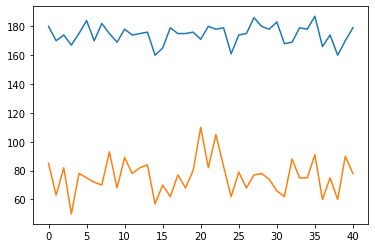

In [97]:
import seaborn as sns

# Hacer un grafico tipo "comun"

sns.lineplot(data = alturas)
sns.lineplot(data = pesos)

<AxesSubplot:>

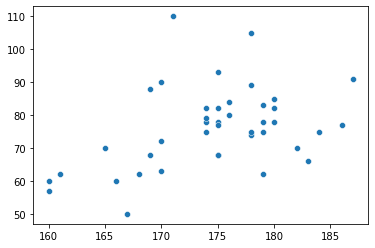

In [98]:
sns.scatterplot(x = alturas, y = pesos)

<AxesSubplot:ylabel='Count'>

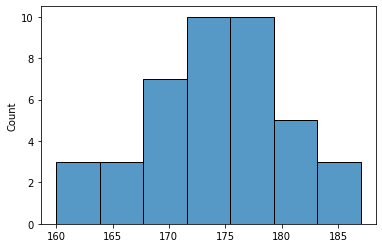

In [99]:
sns.histplot(alturas)

In [100]:
# Como pedirle a numpy que nos calcule la varianza

print (f'La viarianza en las alturas es de: {np.var(alturas)}cm^2')
print (f'La desviacion estandar es de: {np.std(alturas)}cm')

La viarianza en las alturas es de: 42.249851279000595cm^2
La desviacion estandar es de: 6.499988559913056cm


In [101]:
# Vamos a calcular que porcentaje de los valores caen dentro de N desviaciones estandar de la media

n = 1
sd = np.std(alturas)
mean = np.mean(alturas)

mascara = (mean - n * sd < alturas) & (alturas < mean + n * sd)
#print (alturas[mascara])
#print (mascara.sum())
print (f'El porcenaje de valores que caen dentro del {n} desviaciones estandar es: {mascara.sum()/len(mascara)*100}%')


El porcenaje de valores que caen dentro del 1 desviaciones estandar es: 73.17073170731707%


In [102]:
# Comparando variabilidades entre dos variables

print (f'La desviacion estandar de las alturas es {np.std(alturas)}cm, y su valor medio es {np.mean(alturas)}cm. Su ceoficiente de variación es {np.std(alturas)/np.mean(alturas)}')
print (f'La desviacion estandar de los pesos es {np.std(pesos)}Kg, y su valor medio es {np.mean(pesos)}Kg. Su ceoficiente de variación es {np.std(pesos)/np.mean(pesos)}')

La desviacion estandar de las alturas es 6.499988559913056cm, y su valor medio es 174.4878048780488cm. Su ceoficiente de variación es 0.037251821492372834
La desviacion estandar de los pesos es 12.155888108441008Kg, y su valor medio es 76.1219512195122Kg. Su ceoficiente de variación es 0.15968965474081426


In [103]:
sexo = data_cruda[1:,3].copy()
sexo[sexo=="Varon"] = "1"
sexo[sexo=="Mujer"] = "-1"
sexo = sexo.astype(int)
sexo

letras = data_cruda[1:,4]
letras = letras.astype(int)
letras

array([ 8,  7,  8,  5,  8,  5,  7,  9, 10,  3,  9,  8,  6,  9,  9,  6,  8,
        7,  8,  5,  7,  6,  5,  7,  6,  8,  6,  5,  4,  8,  7,  7,  5,  7,
       19,  7,  5,  5,  5,  7,  7])

<AxesSubplot:>

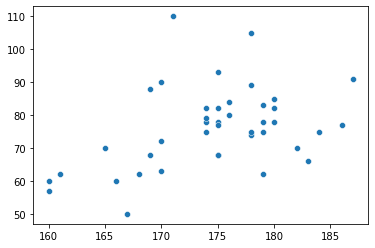

In [104]:
sns.scatterplot(x=alturas, y= pesos)

<AxesSubplot:>

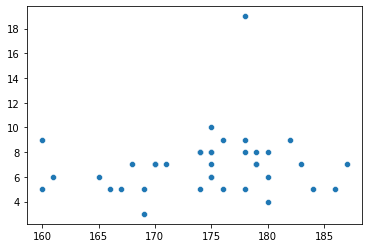

In [105]:
sns.scatterplot(x=alturas, y=letras)

<AxesSubplot:>

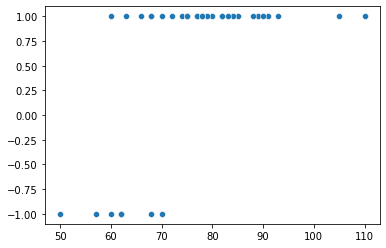

In [106]:
sns.scatterplot(x=pesos, y = sexo)

In [107]:
data_cruda

array([['Marca temporal', '"IndicÃ¡ tu altura en cm sin decimales"',
        'IndicÃ¡ tu peso en Kg sin decimales',
        'Sexo con el que mÃ¡s me identifico',
        'Cuantas letras tiene tu nombre (indicar el nÃºmero entero en formato numÃ©rico)'],
       ['15/09/2022 20:32:28', '180', '85', 'Varon', '8'],
       ['15/09/2022 20:32:34', '170', '63', 'Varon', '7'],
       ['15/09/2022 20:32:47', '174', '82', 'Varon', '8'],
       ['15/09/2022 20:37:29', '167', '50', 'Mujer', '5'],
       ['15/09/2022 20:39:05', '175', '78', 'Varon', '8'],
       ['15/09/2022 20:39:32', '184', '75', 'Varon', '5'],
       ['15/09/2022 20:43:58', '170', '72', 'Varon', '7'],
       ['15/09/2022 20:44:26', '182', '70', 'Varon', '9'],
       ['15/09/2022 20:46:09', '175', '93', 'Varon', '10'],
       ['15/09/2022 20:47:08', '169', '68', 'Mujer', '3'],
       ['15/09/2022 20:49:05', '178', '89', 'Varon', '9'],
       ['15/09/2022 20:55:29', '174', '78', 'Varon', '8'],
       ['15/09/2022 21:10:44', '175',

In [108]:
# Armamos la matriz con todos los datos

datos = [alturas,pesos,sexo,letras]
#print ("Matriz con los datos")
#print (datos)

#print (np.var(datos[0]))
#datos2 = np.transpose(datos)
print ("El orden de las columnas es: alturas, pesos, sexo, letras")
#print ("Matriz de covarianza para los datos")
#print (np.cov(datos,ddof=0))
print ("Matriz de correlacion para los datos")
print (np.corrcoef(datos))

#print ("Vemos que la altura correlaciona con los pesos positivamente, con el sexo negativamente (mujer codifica como valor mas alto y hombre como mas bajo) y no correlaciona con el largo del nombre")

El orden de las columnas es: alturas, pesos, sexo, letras
Matriz de correlacion para los datos
[[1.         0.4101081  0.63347196 0.14722209]
 [0.4101081  1.         0.59731521 0.08149668]
 [0.63347196 0.59731521 1.         0.1819059 ]
 [0.14722209 0.08149668 0.1819059  1.        ]]


In [109]:
np.var(alturas)

42.249851279000595